<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [1]:
#!pip install pandas 
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [2]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [3]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [4]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [5]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65437

## Demo: Listing All Tables


To view the names of all tables in the database:


In [6]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [8]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [9]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

In [10]:
df_com= df.dropna(subset=['CompTotal'], axis=0)

In [11]:
Q1 = df_com['CompTotal'].quantile(0.25)
Q3 = df_com['CompTotal'].quantile(0.75)
IQR = Q3-Q1
print(f"Q1: {Q1} and Q3: {Q3}")
print(f"IQR: {IQR}")

#Calculating upper and lower limits using the IQR, Q1 and Q3
upper_limit= Q3+1.5*IQR
print(f"Upper Limit: {upper_limit}")
lower_limit = Q1-1.5*IQR
print(f"Lower Limit: {lower_limit}")

upper_mask = df_com['CompTotal'] >= upper_limit
lower_mask = df_com['CompTotal'] <= lower_limit

# Combine the masks (logical OR) for rows outside the range
out_of_range_mask = upper_mask | lower_mask

# Drop rows where the condition is True
new_df = df_com[~out_of_range_mask]

Q1: 60000.0 and Q3: 250000.0
IQR: 190000.0
Upper Limit: 535000.0
Lower Limit: -225000.0


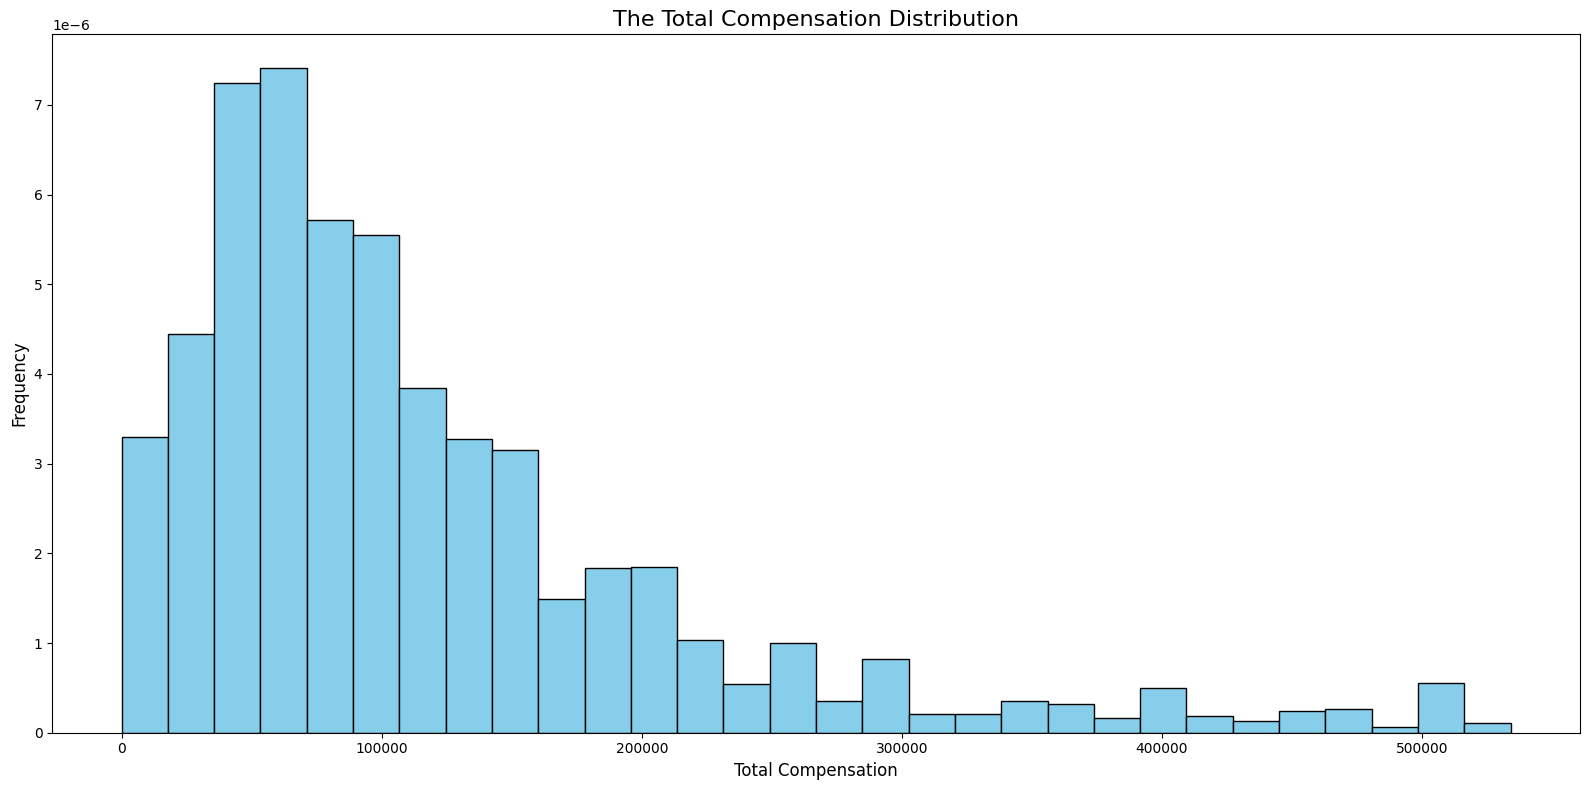

In [22]:
plt.figure(figsize=(16, 8))
plt.hist(data=new_df, x= 'CompTotal', bins= 30, stacked=False, density=True, color='skyblue', edgecolor='black' )
plt.title('The Total Compensation Distribution', fontsize= 16)
plt.xlabel('Total Compensation',fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**Box Plots**

Plot a box plot of Age.


In [16]:
## Write your code here
df['Age']=df['Age'].replace({'years old':'', 'Under':'', 'years or older': '', 'Prefer not to say': 'NaN'}, regex=True)
df['Age'] = df['Age'].str.strip()
def clean_age(value):
    if isinstance(value, (int, float)):
        return float(value) 
    if '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    elif value.isdigit():
        return float(value)
    return None
df['Age'] = df['Age'].apply(clean_age)

In [38]:
df_age = df.dropna(subset= ['Age'], axis=0)

In [44]:
df_age.head()

ResponseId                      MainBranch   Age           Employment  \
0           1  I am a developer by profession  18.0  Employed, full-time   
1           2  I am a developer by profession  39.5  Employed, full-time   
2           3  I am a developer by profession  49.5  Employed, full-time   
3           4           I am learning to code  21.0   Student, full-time   
4           5  I am a developer by profession  21.0   Student, full-time   

  RemoteWork   Check                                   CodingActivities  \
0     Remote  Apples                                              Hobby   
1     Remote  Apples  Hobby;Contribute to open-source projects;Other...   
2     Remote  Apples  Hobby;Contribute to open-source projects;Other...   
3       None  Apples                                               None   
4       None  Apples                                               None   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                               None  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                   None       None                 NaN    NaN  
1             0.0                   None       None                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

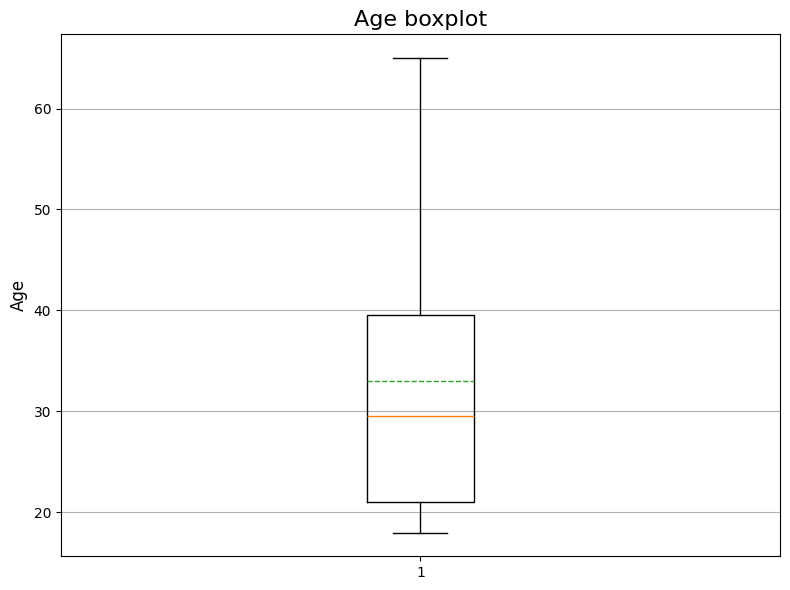

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(data=df_age, x='Age', showmeans=True,meanline=True)
plt.ylabel("Age", fontsize = 12)
plt.grid(axis='y')
plt.title('Age boxplot', fontsize=16)
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


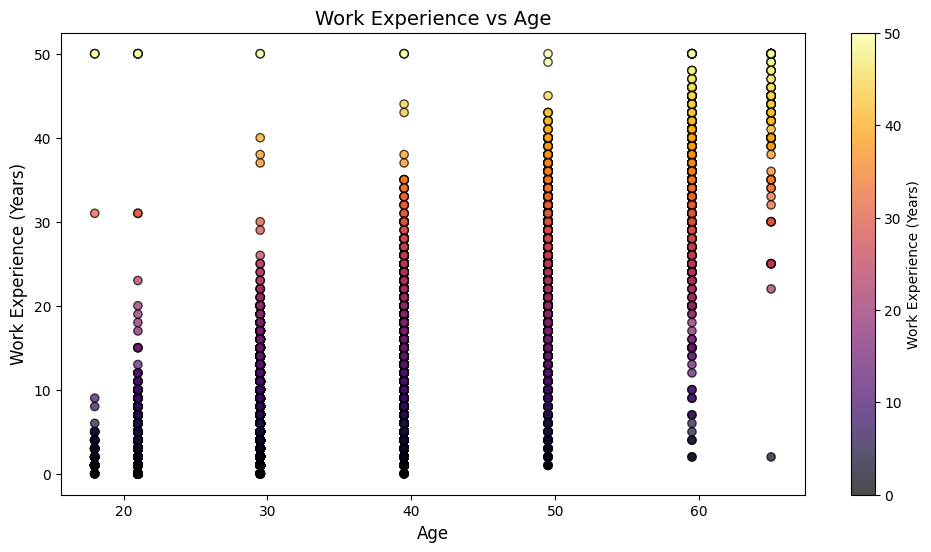

In [24]:
## Write your code here
plt.figure(figsize=(12,6))
plt.scatter(y=df['WorkExp'], x=df['Age'], c=df['WorkExp'], cmap='inferno', alpha=0.7, edgecolors='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)
plt.title('Work Experience vs Age', fontsize=14)
plt.colorbar(label='Work Experience (Years)')
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [13]:
import plotly.express as px

In [39]:
columns = ['TimeSearching','Frustration']
for col in columns:
    df_age[col] = df_age[col].fillna(df_age[col].mode()[0])

C:\Users\choph\AppData\Local\Temp\ipykernel_16176\3997361982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[col] = df_age[col].fillna(df_age[col].mode()[0])


In [53]:
fig = px.scatter(
    df_age, 
    x='TimeSearching', 
    y='Frustration', 
    size='Age',
    color='Age',
    color_continuous_scale='Inferno',
    title='Bubble Plot of Time Searching vs Frustration (Bubble Size = Age)',
    labels={'TimeSearching': 'Time Spent Searching', 'Frustration': 'Frustration Level', 'Age': 'Age'}
)
fig.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [26]:
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

In [27]:
## Write your code here
top_5_databases = db_series.value_counts().head(5)

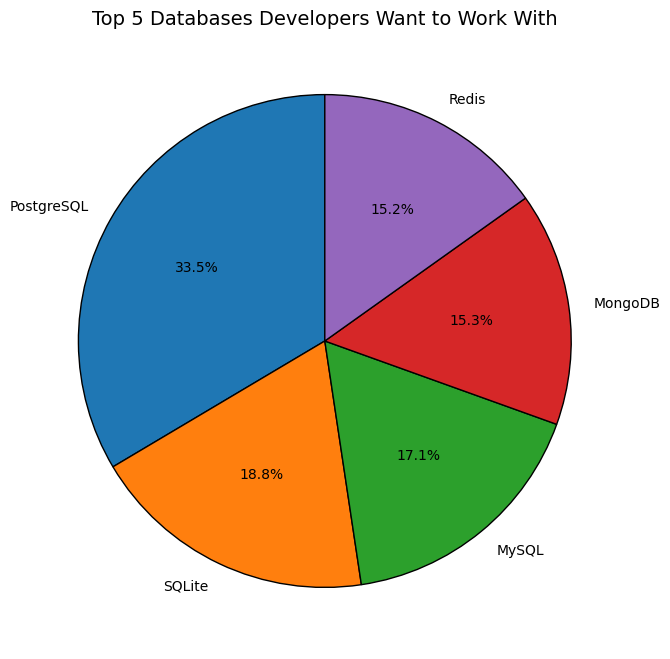

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_databases, 
    labels=top_5_databases.index, 
    autopct='%1.1f%%',  
    startangle=90, 
    wedgeprops={'edgecolor': 'black'} 
)

plt.title('Top 5 Databases Developers Want to Work With', fontsize=14)
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [51]:
import numpy as np
# Define a mapping from the time range strings to numerical values
time_range_mapping = {
    '30-60 minutes a day': 45,  # Midpoint of the range 30-60
    '60-120 minutes a day': 90,  # Midpoint of the range 60-120
    '15-30 minutes a day': 22.5,  # Midpoint of the range 15-30
    'Less than 15 minutes a day': 14,  # Approximation for 'Less than 15 minutes'
    'Over 120 minutes a day': 125,  # Approximation for 'Over 120 minutes'
}
# Reset index for df_age
df_age = df_age.reset_index(drop=True)

# Filter df_age based on the 'Age' column
df_age_group = df_age[(df_age['Age'] >= 30) & (df_age['Age'] <= 35)]

# Apply the mapping to each of the 'TimeAnswering' and 'TimeSearching' columns separately
df_age_group['TimeAnswering'] = df_age_group['TimeAnswering'].apply(lambda x: time_range_mapping.get(x, np.nan))
df_age_group['TimeSearching'] = df_age_group['TimeSearching'].apply(lambda x: time_range_mapping.get(x, np.nan))

# Show the updated DataFrame
print(df_age_group[['TimeAnswering', 'TimeSearching']])


Empty DataFrame
Columns: [TimeAnswering, TimeSearching]
Index: []


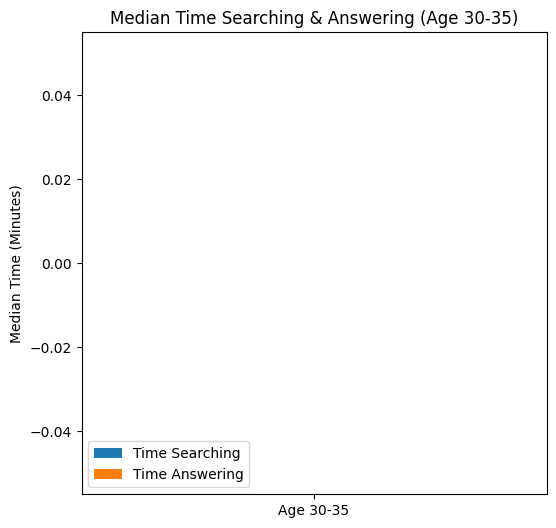

In [52]:
## Write your code here
#Compute median values
median_searching = df_age_group['TimeSearching'].median()
median_answering = df_age_group['TimeAnswering'].median()

#Plot stacked bar chart
categories = ['Age 30-35']  # Single category
time_values = np.array([[median_searching], [median_answering]])  # Stack values

# Define colors
colors = ['#1f77b4', '#ff7f0e']  # Blue & Orange

# Create stacked bars
plt.figure(figsize=(6, 6))
plt.bar(categories, time_values[0], label='Time Searching', color=colors[0])
plt.bar(categories, time_values[1], bottom=time_values[0], label='Time Answering', color=colors[1])

# Labels and title
plt.ylabel('Median Time (Minutes)')
plt.title('Median Time Searching & Answering (Age 30-35)')
plt.legend()

# Show plot
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [61]:
## Write your code here
df_age = df_age.reset_index(drop=True)
# Filter df_age based on the 'Age' column
df_age_comp = df_age[(df_age['Age'] >= 45) & (df_age['Age'] <= 60)]
median_comp = df_age_comp.groupby('Age')['CompTotal'].median().reset_index()

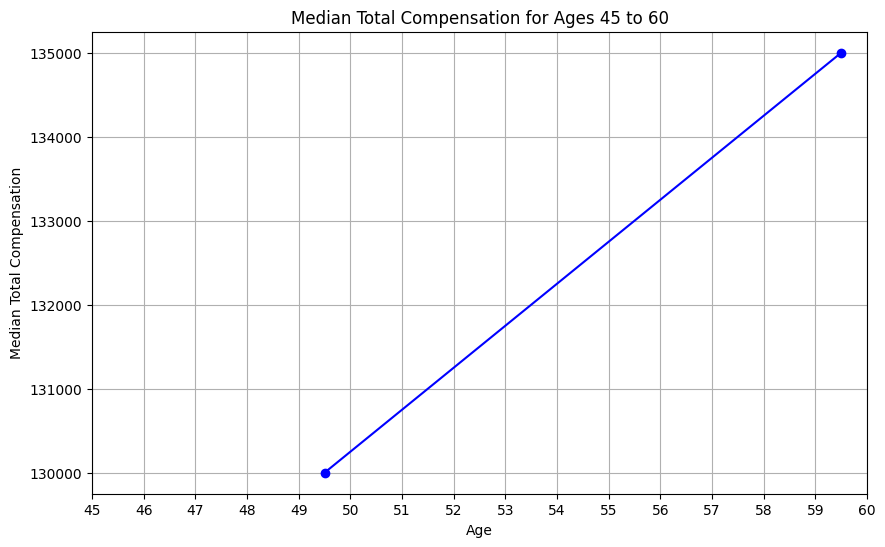

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(median_comp['Age'], median_comp['CompTotal'], marker='o', linestyle='-', color='b')
plt.title('Median Total Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Total Compensation')
plt.grid(True)
plt.xticks(range(45, 61))  # Set the x-axis to show all ages from 45 to 60
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


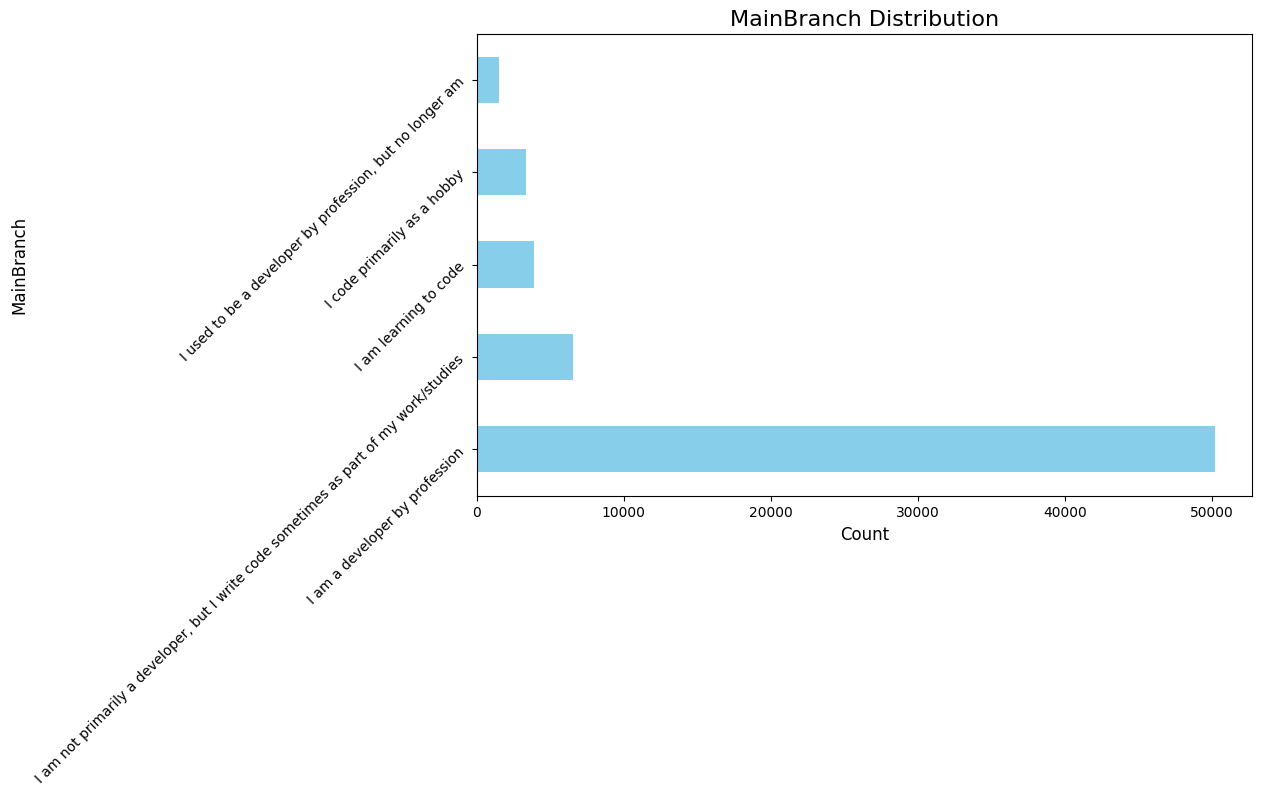

In [67]:
# Count the occurrences of each category in the 'MainBranch' column
mainbranch_counts = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')

# Adding labels and title
plt.title('MainBranch Distribution', fontsize = 16)
plt.xlabel('Count',fontsize = 12)
plt.ylabel('MainBranch',fontsize = 12)
plt.yticks(rotation = 45)
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [68]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
